In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("health_risk.csv")
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


# Health Risk Classification and House Energy Consumption Prediction
This project demonstrates the application of the **K-Nearest Neighbors (KNN)** algorithm on two distinct tasks:
1. **Classification:** Predicting health risk categories based on medical metrics.
2. **Regression:** Estimating daily energy consumption for residential buildings.

The project covers the entire machine learning pipeline, including exploratory data analysis (EDA), feature scaling, hyperparameter tuning via the Elbow Method, and model evaluation.

In [3]:
df.isnull().sum()

bmi_score                   0
blood_pressure_variation    0
activity_level_index        0
high_risk_flag              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


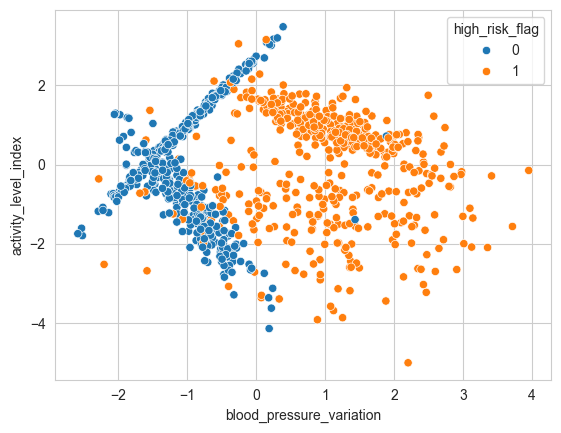

In [6]:
sns.scatterplot(x=df["blood_pressure_variation"], y=df["activity_level_index"],hue=df["high_risk_flag"])
plt.show()

In [7]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [8]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

<Axes: >

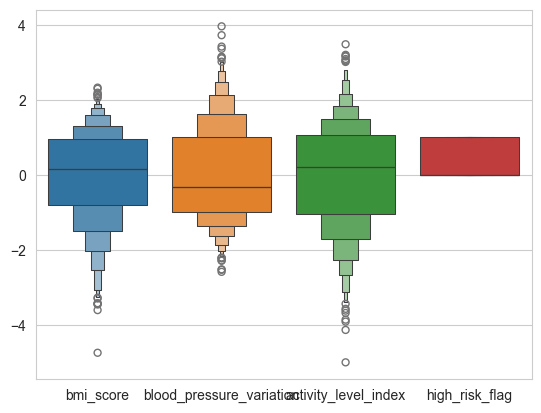

In [10]:
sns.boxenplot(df)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Feature Scaling (Standardization)
Since KNN is a distance-based algorithm (relying on Euclidean or Minkowski distance), features with larger scales can disproportionately influence the results. I used **StandardScaler** to normalize the data, ensuring that all features contribute equally to the distance calculations.

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

### Hyperparameter Tuning: Finding the Optimal K
To select the best number of neighbors ($K$), I implemented the **Elbow Method**. This involves iterating through various $K$ values and plotting the error rate (for classification) or Root Mean Squared Error (for regression). The goal is to identify the "elbow" point where the error stabilizes, ensuring a balance between bias and variance to prevent overfitting.

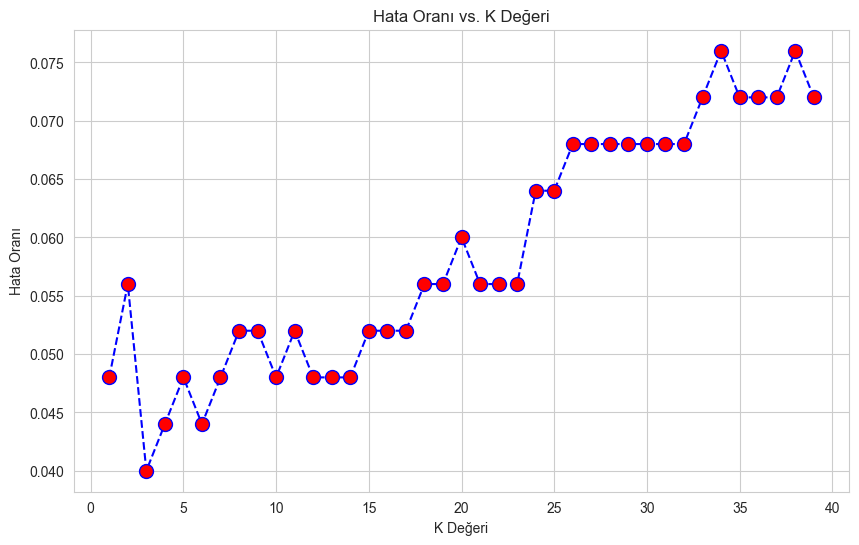

In [15]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Hata Oranı vs. K Değeri')
plt.xlabel('K Değeri')
plt.ylabel('Hata Oranı')
plt.show()

In [16]:
classifier.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [17]:
y_pred = classifier.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))


[[124  10]
 [  2 114]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       134
           1       0.92      0.98      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

0.952


### Model Evaluation and Performance Metrics
To assess the model's reliability, the following metrics are calculated:
* **Classification:** Accuracy Score, Confusion Matrix, and Classification Report (Precision, Recall, F1-Score).
* **Regression:** Mean Absolute Error (MAE), Mean Squared Error (MSE), and $R^2$ Score.

In [20]:
df_reg = pd.read_csv("house_energy_regression.csv")
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [21]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [22]:
df_reg.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


<Axes: >

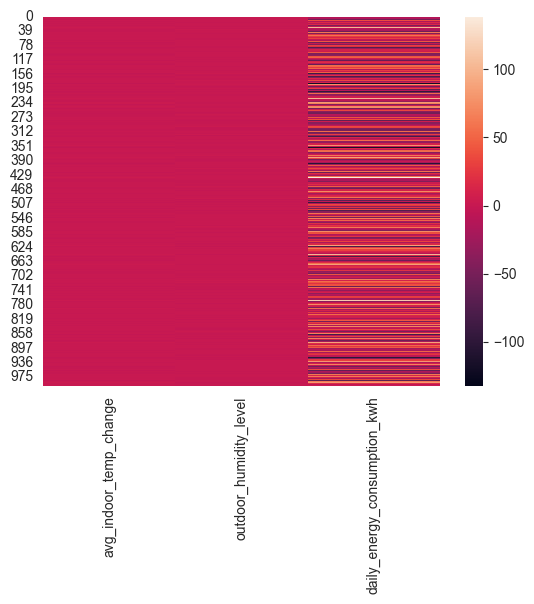

In [43]:
sns.heatmap(df_reg)


In [24]:
X = df_reg.drop("daily_energy_consumption_kwh", axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

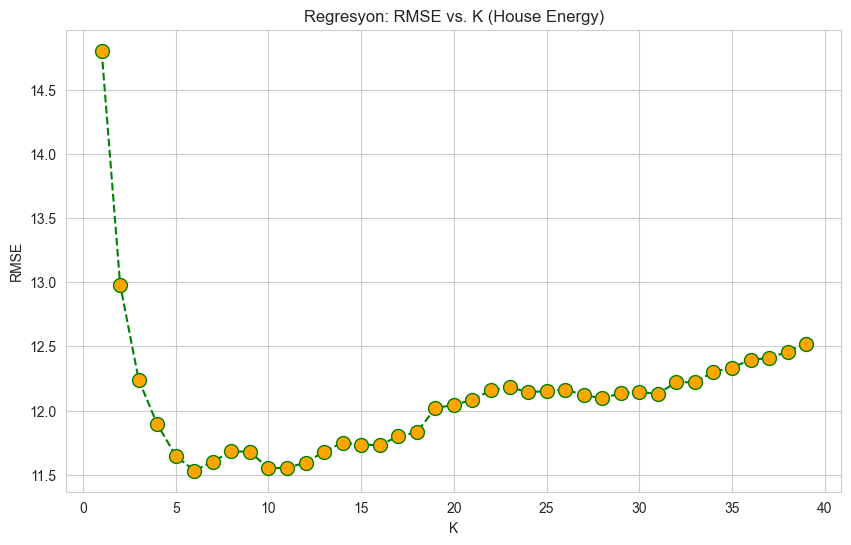

In [40]:
rmse_list = []

for k in range(1, 40):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_train)

    y_pred_k = knn_reg.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_k))
    rmse_list.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), rmse_list, color='green', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Regresyon: RMSE vs. K (House Energy)')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [35]:
regressor = KNeighborsRegressor(n_neighbors=7)

In [36]:
regressor.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",7
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [37]:
y_pred = regressor.predict(X_test_scaled)

In [38]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9189374253850693
134.62063167240598
9.326118628600977


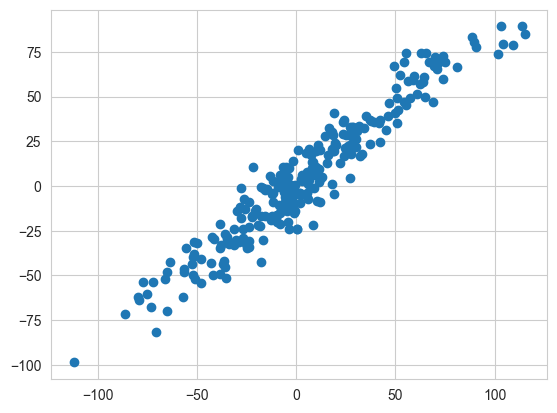

In [39]:
plt.scatter(y_test, y_pred)
plt.show()

### Model Evaluation and Performance Metrics
To assess the model's reliability, the following metrics are calculated:
* **Classification:** Accuracy Score, Confusion Matrix, and Classification Report (Precision, Recall, F1-Score).
* **Regression:** Mean Absolute Error (MAE), Mean Squared Error (MSE), and $R^2$ Score.